# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import pandas as pd
import warnings
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Importing the dataset

In [3]:
dataset = pd.read_excel('ReviewFinalML2.xlsx')


In [4]:
dataset.info(
    
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153076 entries, 0 to 153075
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 153076 non-null  float64
 1   name_reviewer           153075 non-null  object 
 2   rating                  153076 non-null  int64  
 3   review                  90484 non-null   object 
 4   gmap_id                 153076 non-null  object 
 5   estado                  153076 non-null  object 
 6   name_business           153076 non-null  object 
 7   address                 152943 non-null  object 
 8   description             34269 non-null   object 
 9   latitude                153076 non-null  float64
 10  longitude               153076 non-null  float64
 11  avg_rating              153076 non-null  float64
 12  num_of_reviews          153076 non-null  int64  
 13  category 1              153076 non-null  object 
 14  category 2          

In [5]:
filteredDF = dataset[dataset['description_prof_score'] > 1]

In [6]:
# Scaling the column values to the range [0, 100]
scaler = MinMaxScaler(feature_range=(0, 100))
filteredDF['flesch_score'] = scaler.fit_transform(filteredDF[['flesch_score']])



In [7]:
    
filteredDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 153071
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 9913 non-null   float64
 1   name_reviewer           9913 non-null   object 
 2   rating                  9913 non-null   int64  
 3   review                  5634 non-null   object 
 4   gmap_id                 9913 non-null   object 
 5   estado                  9913 non-null   object 
 6   name_business           9913 non-null   object 
 7   address                 9913 non-null   object 
 8   description             9913 non-null   object 
 9   latitude                9913 non-null   float64
 10  longitude               9913 non-null   float64
 11  avg_rating              9913 non-null   float64
 12  num_of_reviews          9913 non-null   int64  
 13  category 1              9913 non-null   object 
 14  category 2              9913 non-null 

In [23]:
FinalDF = filteredDF[['user_id', 'dispersion_score', 'flesch_score', 'prof_review_score']]

In [24]:
DFAggregated = FinalDF.groupby('user_id').agg({
    'dispersion_score': 'mean',     # Average ScoreA
    'flesch_score': 'mean',      # Sum ScoreB
    'prof_review_score': 'sum'       # Sum ScoreC
}).reset_index()








In [26]:
DFAggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9445 entries, 0 to 9444
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            9445 non-null   float64
 1   dispersion_score   9445 non-null   float64
 2   flesch_score       9445 non-null   float64
 3   prof_review_score  9445 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 295.3 KB


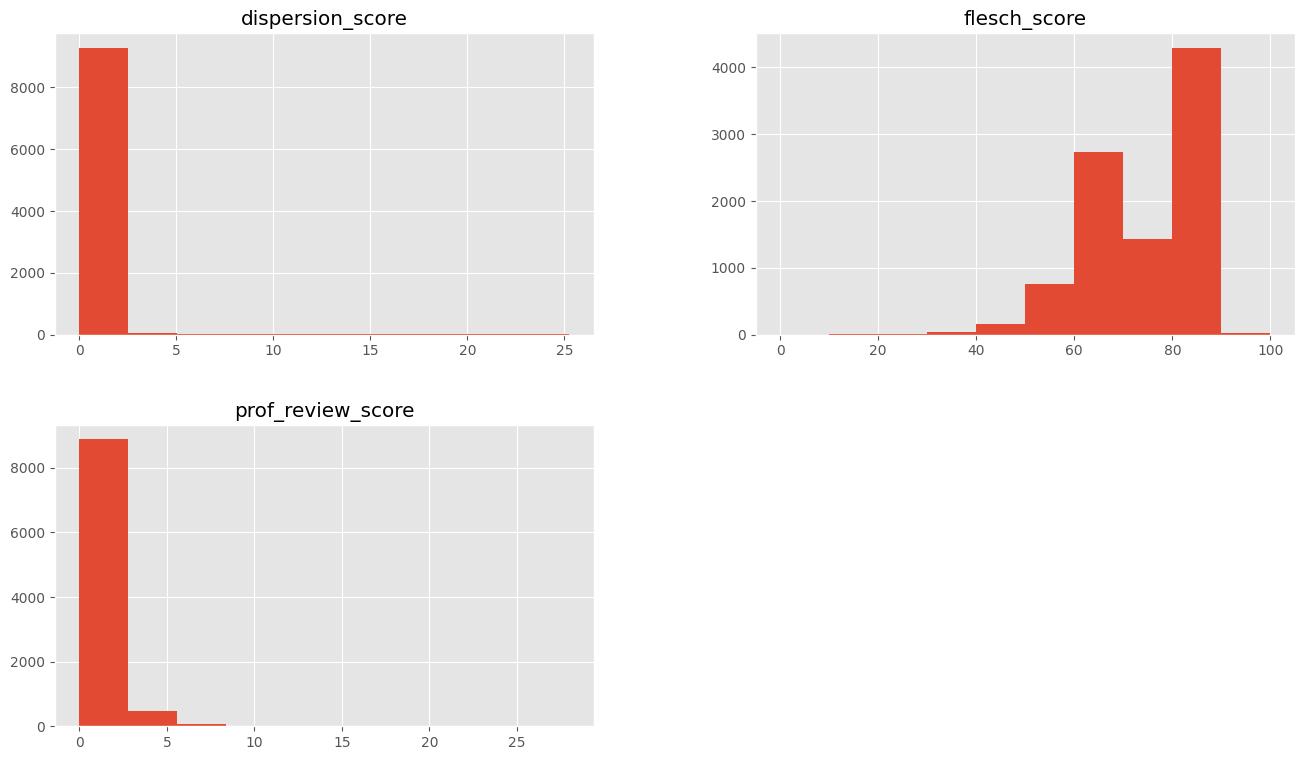

In [27]:
DFAggregated.drop(['user_id'],1).hist()
plt.show()

In [28]:
cols_names = DFAggregated.columns[[ -3,-2,-1]].tolist()
print(cols_names)

['dispersion_score', 'flesch_score', 'prof_review_score']


In [29]:
X = DFAggregated.iloc[:,[ -3,-2,-1]].values

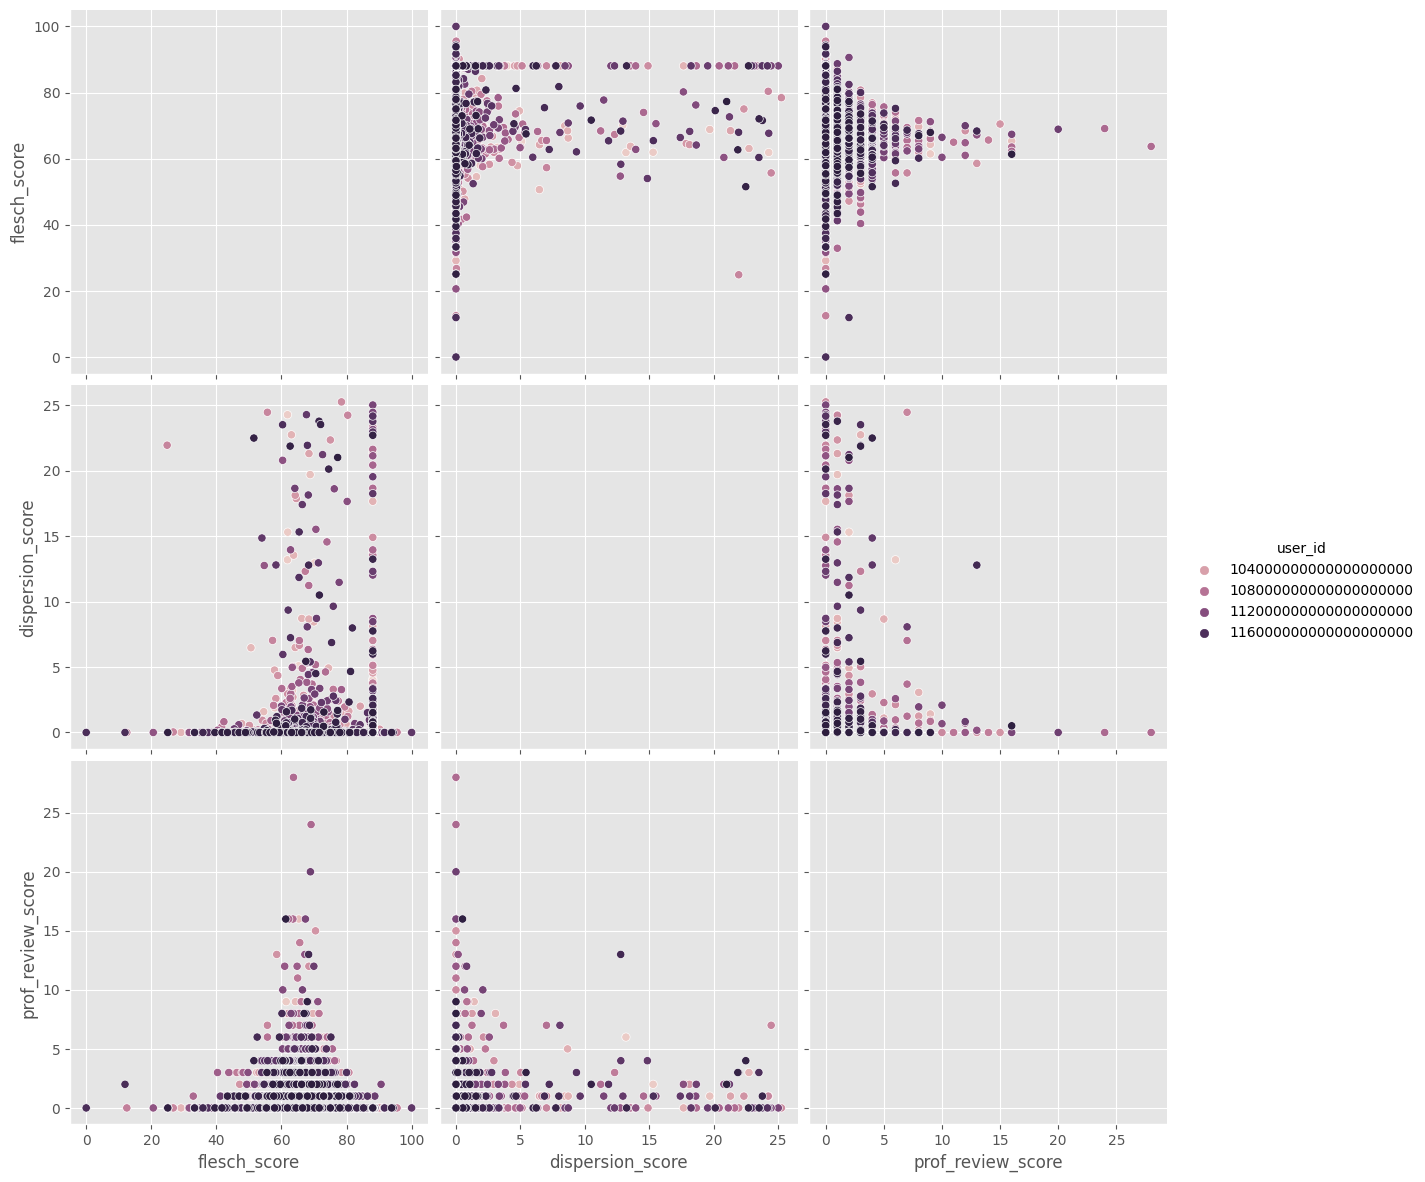

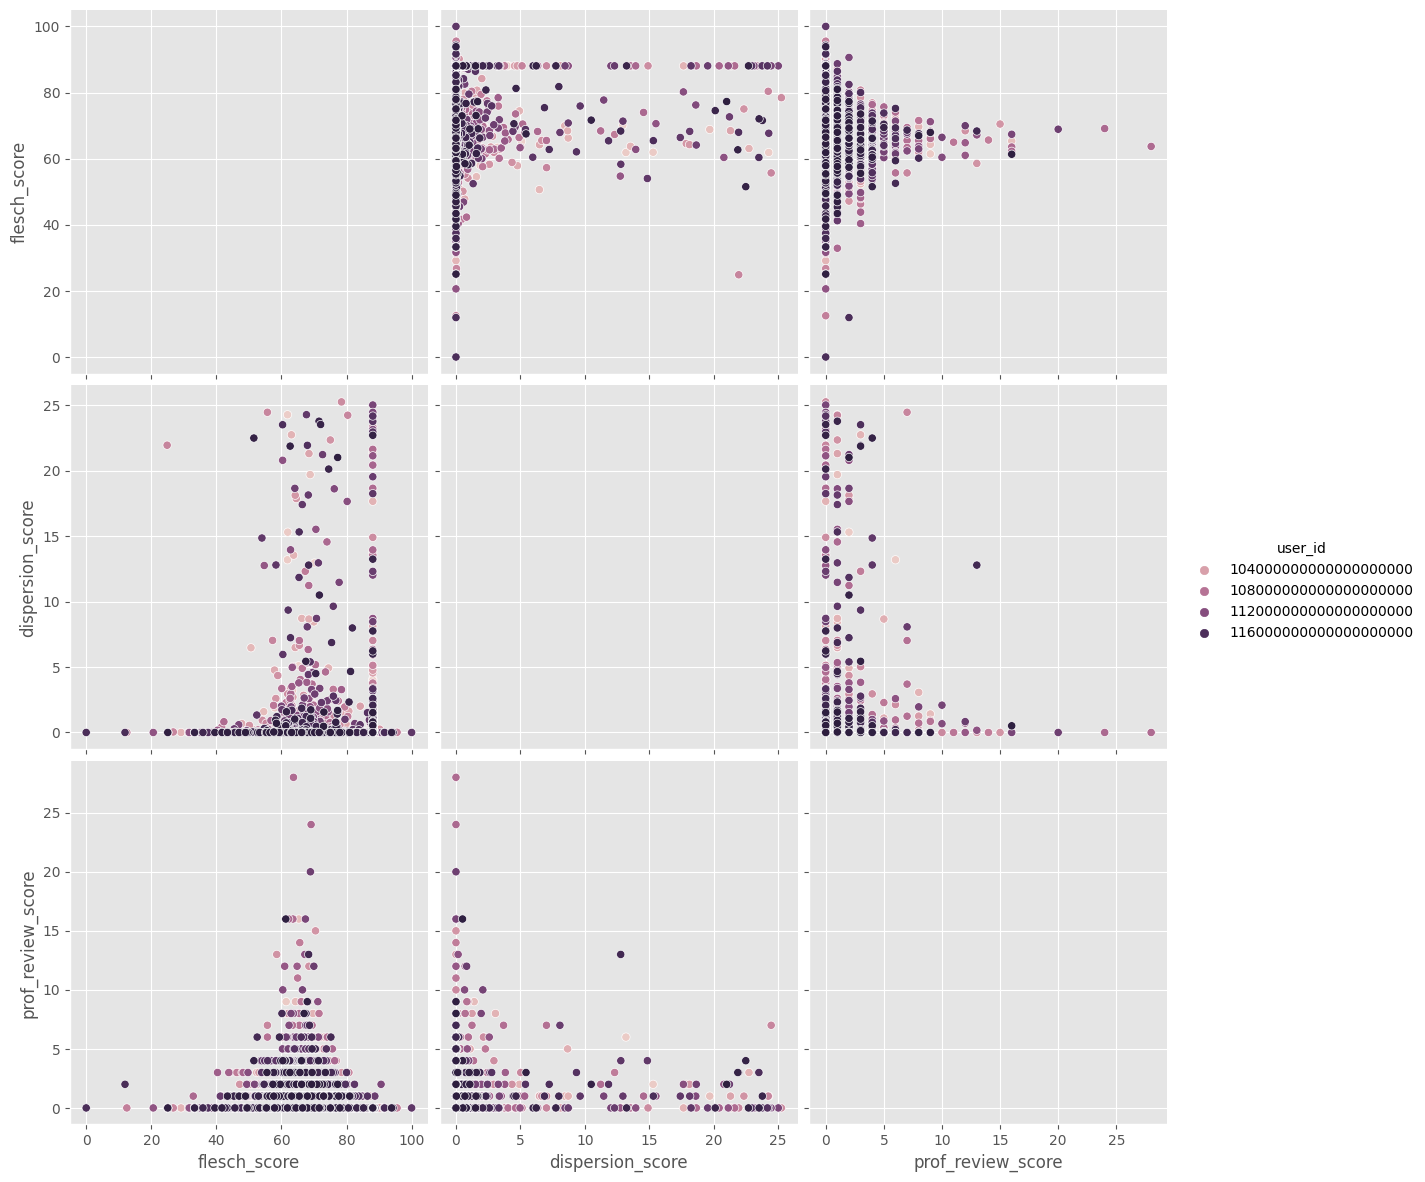

In [30]:

sb.pairplot(DFAggregated.dropna(), hue='user_id',size=4,vars=['flesch_score', 'dispersion_score', 'prof_review_score'],kind='scatter')
1
sb.pairplot(DFAggregated.dropna(), hue='user_id',size=4,vars=['flesch_score', 'dispersion_score', 'prof_review_score'],kind='scatter')

## Using the elbow method to find the optimal number of clusters

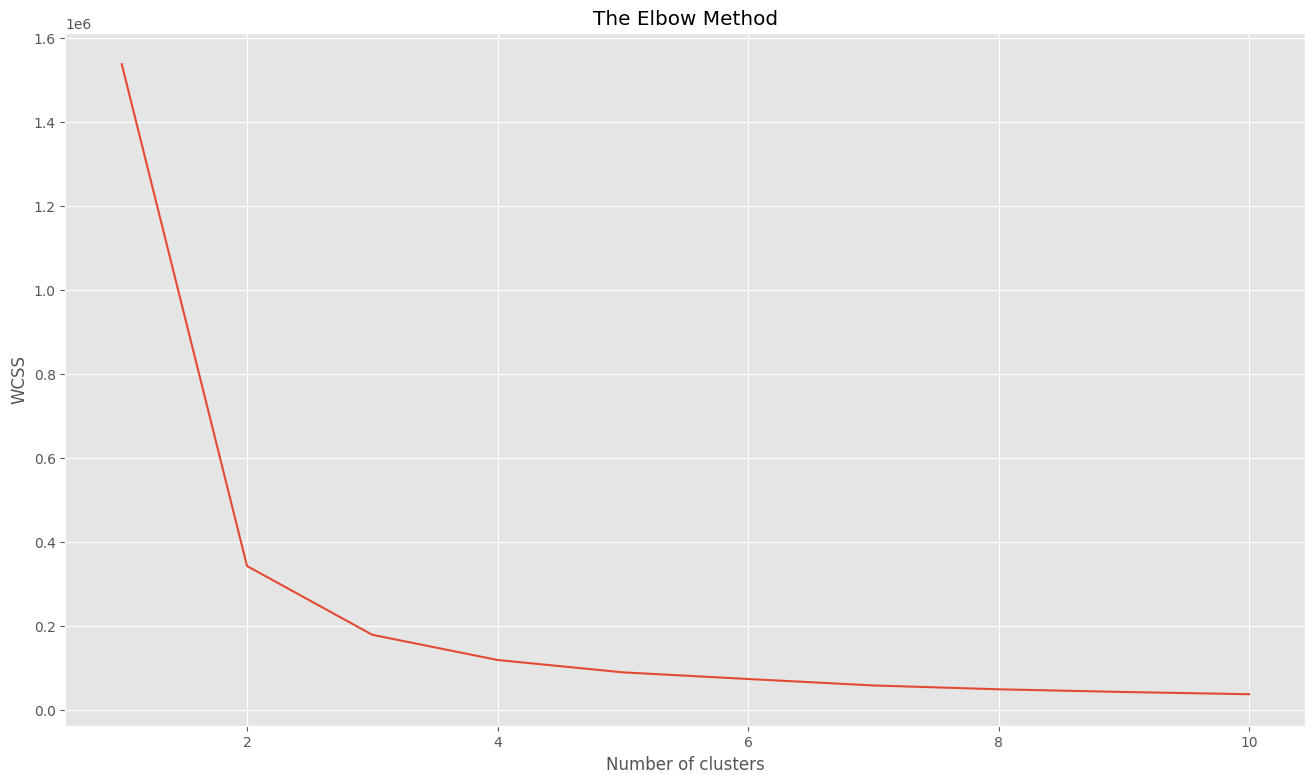

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

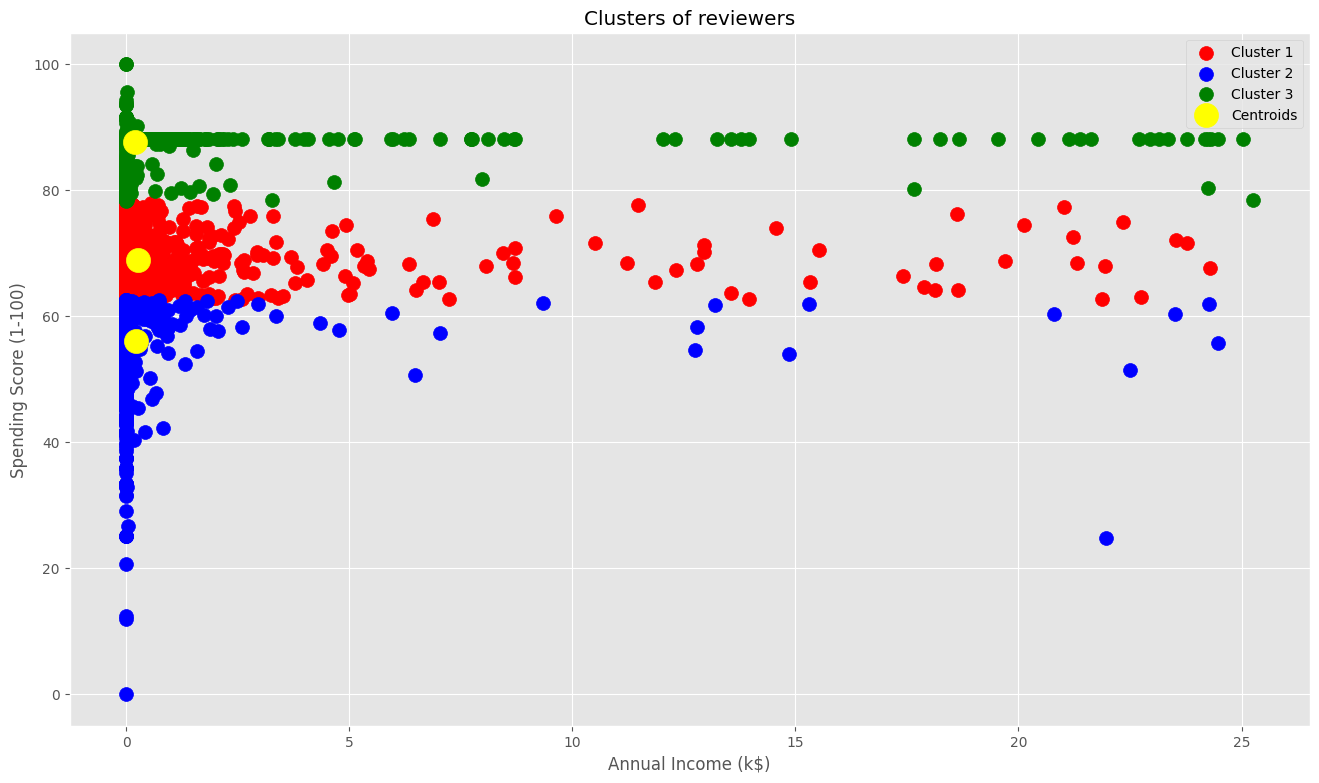

In [34]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of reviewers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

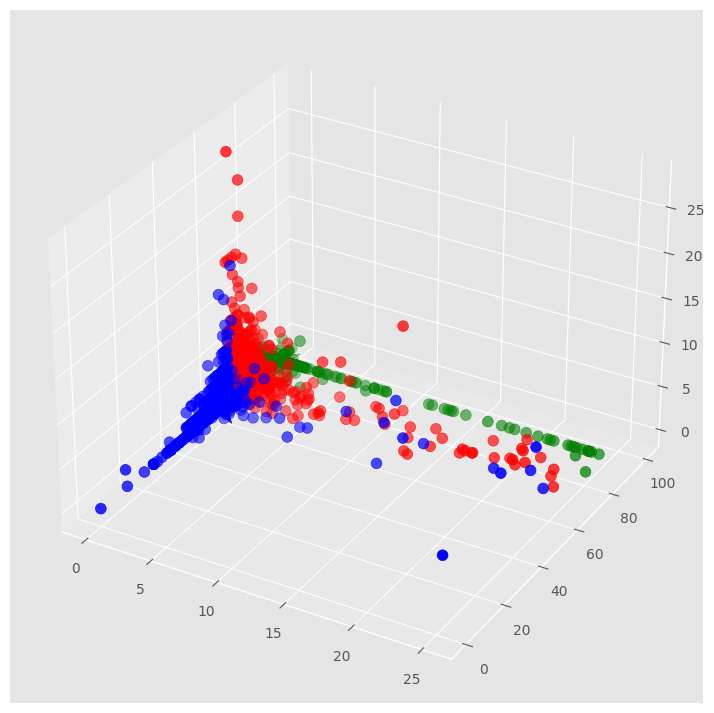

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans



# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

colores = ['red', 'green', 'blue']
asignar = [colores[label] for label in labels]

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [38]:
DFAggregated['bottles']=y_kmeans

In [43]:
DFAggregated['bottles'] = DFAggregated['bottles'].replace({0: 3, 1: 2, 2: 1})

In [44]:
sorted_df = DFAggregated.sort_values(by='prof_review_score', ascending=False)
sorted_df.head()

,user_id,dispersion_score,flesch_score,prof_review_score,bottles
4478,1.089300e+20,0.0,63.700475,28,3
4583,1.091199e+20,0.0,69.106543,24,3
6990,1.137933e+20,0.0,68.898870,20,3
4507,1.089805e+20,0.0,63.518817,16,3
685,1.015789e+20,0.0,65.327885,16,3


In [45]:
DFAggregated.to_excel("DataFrameKM++.xlsx")

 In unsupervised learning, we only have input data and no corresponding output variables. The goal is to model the underlying structure or distribution in the data in order to learn more about the data. K-Means clustering is an example of unsupervised learning.

for K-Means clustering (an unsupervised technique), there is no dependent variable (or label) to predict. Thus, the traditional notion of splitting the data into a training set and a test set doesn't apply in the same way it does for supervised methods. Instead of evaluating the accuracy of predictions against known labels, the focus in unsupervised learning (like clustering) is often on understanding patterns, structures, or reducing dimensions.